In [1]:
import numpy as np
import copy
from astropy.io import fits
from importlib import reload
import matplotlib.pyplot as plt
plt.rcParams['image.origin']='lower'
import os
from pathlib import Path
from datetime import datetime
date = int(datetime.today().strftime('%Y%m%d'))

import proper
proper.use_ffti = False
proper.use_fftw = False

import roman_phasec_proper as phasec
phasec.copy_here()
import falco

from IPython.display import clear_output, display, HTML
display(HTML("<style>.container { width:90% !important; }</style>")) # just making the notebook cells wider

falco_dir = Path(os.path.dirname(falco.__file__))
roman_dir = Path(os.path.dirname(falco_dir))/'roman'
flatmap_dir = roman_dir/'flatmaps'

import misc
from imshows import *

In [13]:
# date = 20230728
# Nitr = 30
# estimator = 'pwp-bp'
# mp = misc.load_pickle(f'results/hlc_575_{Nitr}itr_{estimator}_mp_{date}.pkl')
# out = misc.load_pickle(f'results/hlc_575_{Nitr}itr_{estimator}_out_{date}.pkl')

mp = misc.load_pickle('results/hlc_575_test_mp_20230728.pkl')
out = misc.load_pickle('results/hlc_575_test_out_20230728.pkl')

In [14]:
out.__dir__()

['dm1',
 'dm2',
 'dm8',
 'dm9',
 'Fend',
 'Nitr',
 'log10regHist',
 'EforSpectra',
 'smspectra',
 'sm',
 'alpha2',
 'Zsens',
 'complexProjection',
 'complexCorrelation',
 'InormHist',
 'IrawCorrHist',
 'IrawScoreHist',
 'IestCorrHist',
 'IestScoreHist',
 'IincoCorrHist',
 'IincoScoreHist',
 'normIntMeasCorr',
 'normIntMeasScore',
 'normIntModCorr',
 'normIntModScore',
 'normIntUnmodCorr',
 'normIntUnmodScore',
 'thput',
 'serialDate',
 'Itr',
 '__new__',
 '__repr__',
 '__getattribute__',
 '__setattr__',
 '__delattr__',
 '__lt__',
 '__le__',
 '__eq__',
 '__ne__',
 '__gt__',
 '__ge__',
 '__init__',
 '__reduce__',
 '__dict__',
 '__doc__',
 '__hash__',
 '__str__',
 '__reduce_ex__',
 '__getstate__',
 '__subclasshook__',
 '__init_subclass__',
 '__format__',
 '__sizeof__',
 '__dir__',
 '__class__']

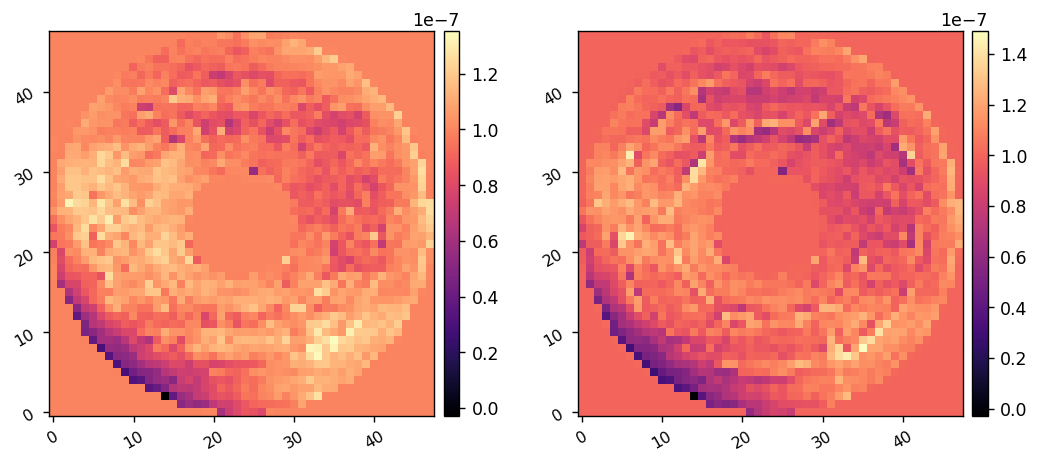

5.503240391994513e-09 7.454285491663368e-09


In [19]:

mp.dm1.V = out.dm1.Vall[:,:,out.Nitr]
mp.dm2.V = out.dm2.Vall[:,:,out.Nitr]
mp.dm1.V = out.dm1.Vall[:,:,23]
mp.dm2.V = out.dm2.Vall[:,:,23]

dm1_m = (mp.dm1.V + mp.dm1.biasMap + 50)*mp.dm1.VtoH
dm2_m = (mp.dm2.V + mp.dm2.biasMap + 50)*mp.dm2.VtoH
imshow2(dm1_m, dm2_m, )

dm1_rms = np.sqrt(np.mean(mp.dm1.V.ravel()[mp.dm1.act_ele]**2))*mp.dm2.VtoH[0,0]
dm2_rms = np.sqrt(np.mean(mp.dm2.V.ravel()[mp.dm2.act_ele]**2))*mp.dm2.VtoH[0,0]
print(dm1_rms, dm2_rms)

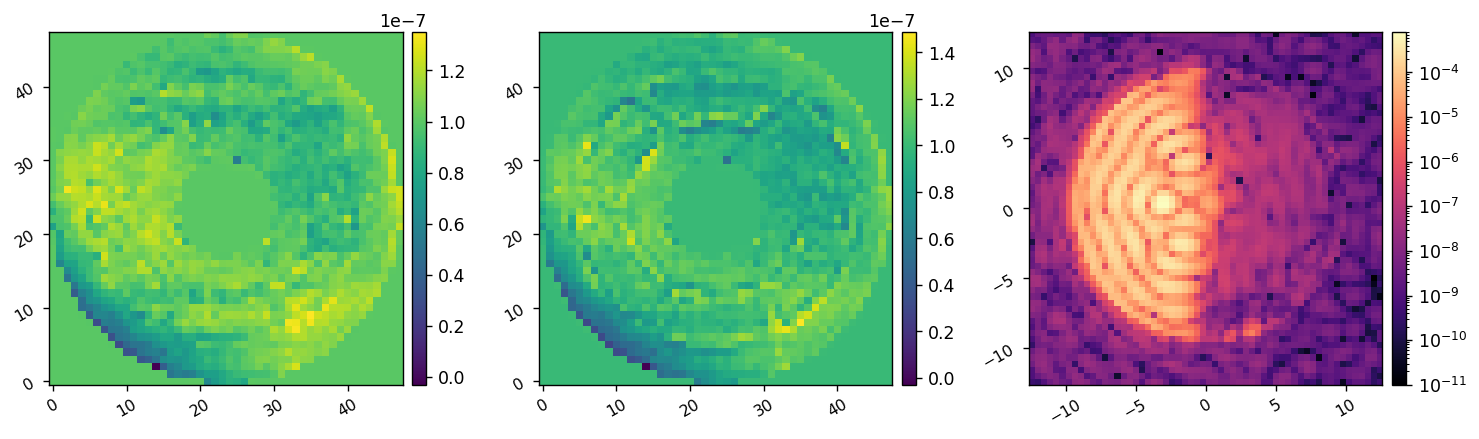

In [20]:
falco_image = falco.get_summed_image(mp)
imshow3(dm1_m, dm2_m, falco_image, 
        cmap1='viridis', cmap2='viridis',
        pxscl3=1/mp.Fend.res, lognorm3=True, vmin3=1e-11)

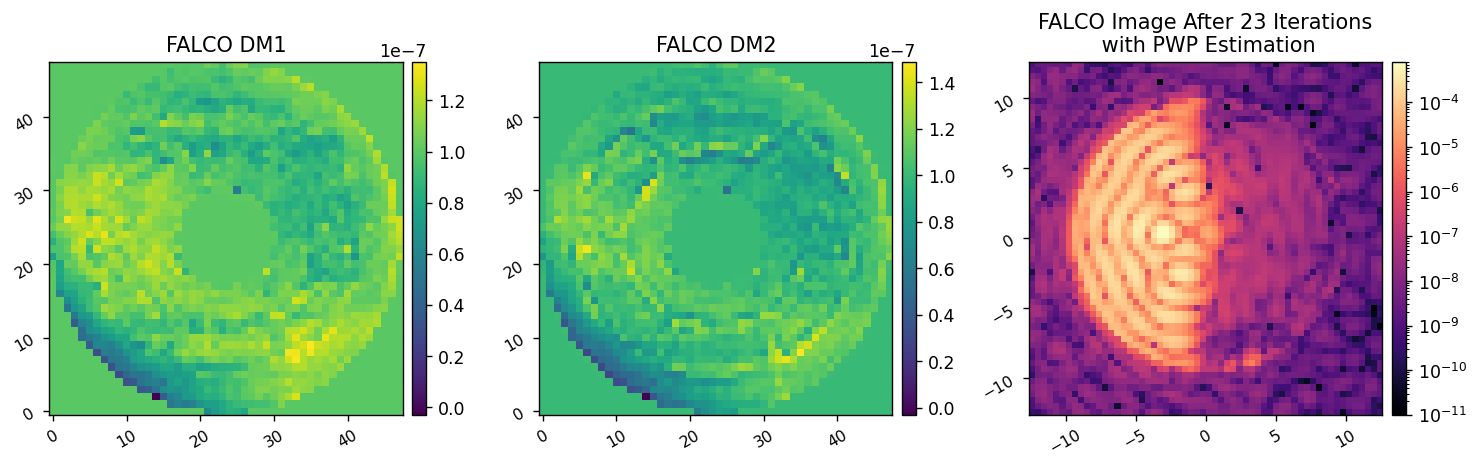

In [22]:
imshow3(dm1_m, dm2_m, falco_image, 
        'FALCO DM1', 'FALCO DM2', f'FALCO Image After 23 Iterations\n with PWP Estimation',
        cmap1='viridis', cmap2='viridis',
        pxscl3=1/mp.Fend.res, lognorm3=True, vmin3=1e-11)



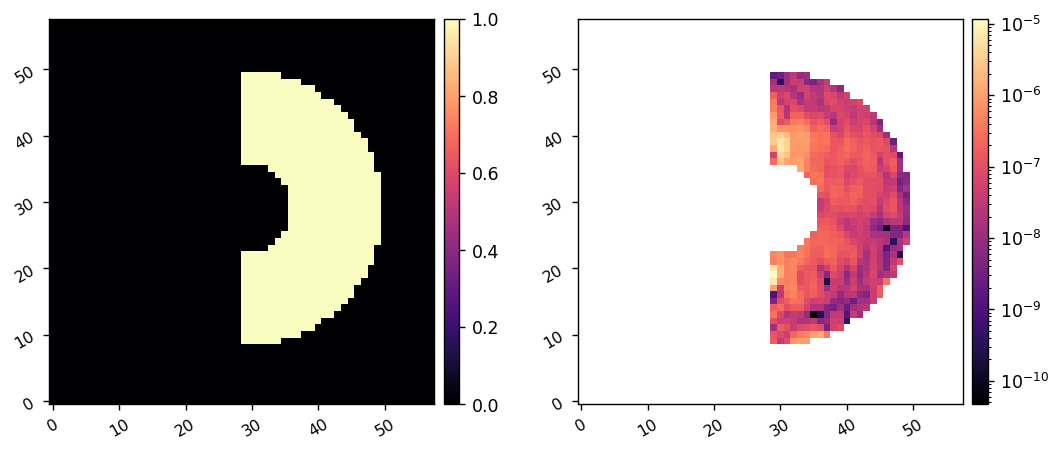

2.5778349506646e-07


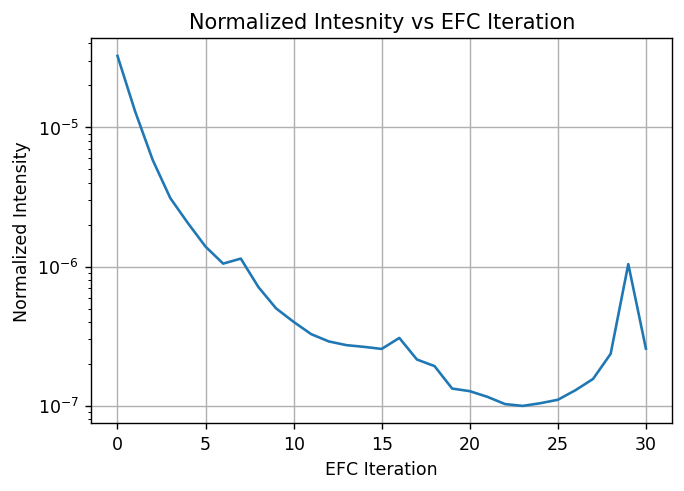

In [18]:
imshow2(mp.Fend.score.maskBool, mp.Fend.score.maskBool*falco_image, lognorm2=True)
final_NI = np.mean(falco_image[mp.Fend.score.maskBool])
print(final_NI)


x = np.arange(0,out.Nitr+1)
NIs = np.append(out.IrawScoreHist[:-1], final_NI)
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4), dpi=125)
ax.semilogy(x, NIs,)
ax.set_title('Normalized Intesnity vs EFC Iteration')
ax.set_ylabel('Normalized Intensity')
ax.set_xlabel('EFC Iteration')
ax.grid()